1. ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• PTT (Limit: 300 ‡∏ß‡∏±‡∏ô)...

2. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Wyckoff Events ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î...

‚úÖ ‡∏û‡∏ö‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå Accumulation (SC/AR/Spring): 6 ‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå

3.1 ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü Wyckoff ACCUMULATION Events...


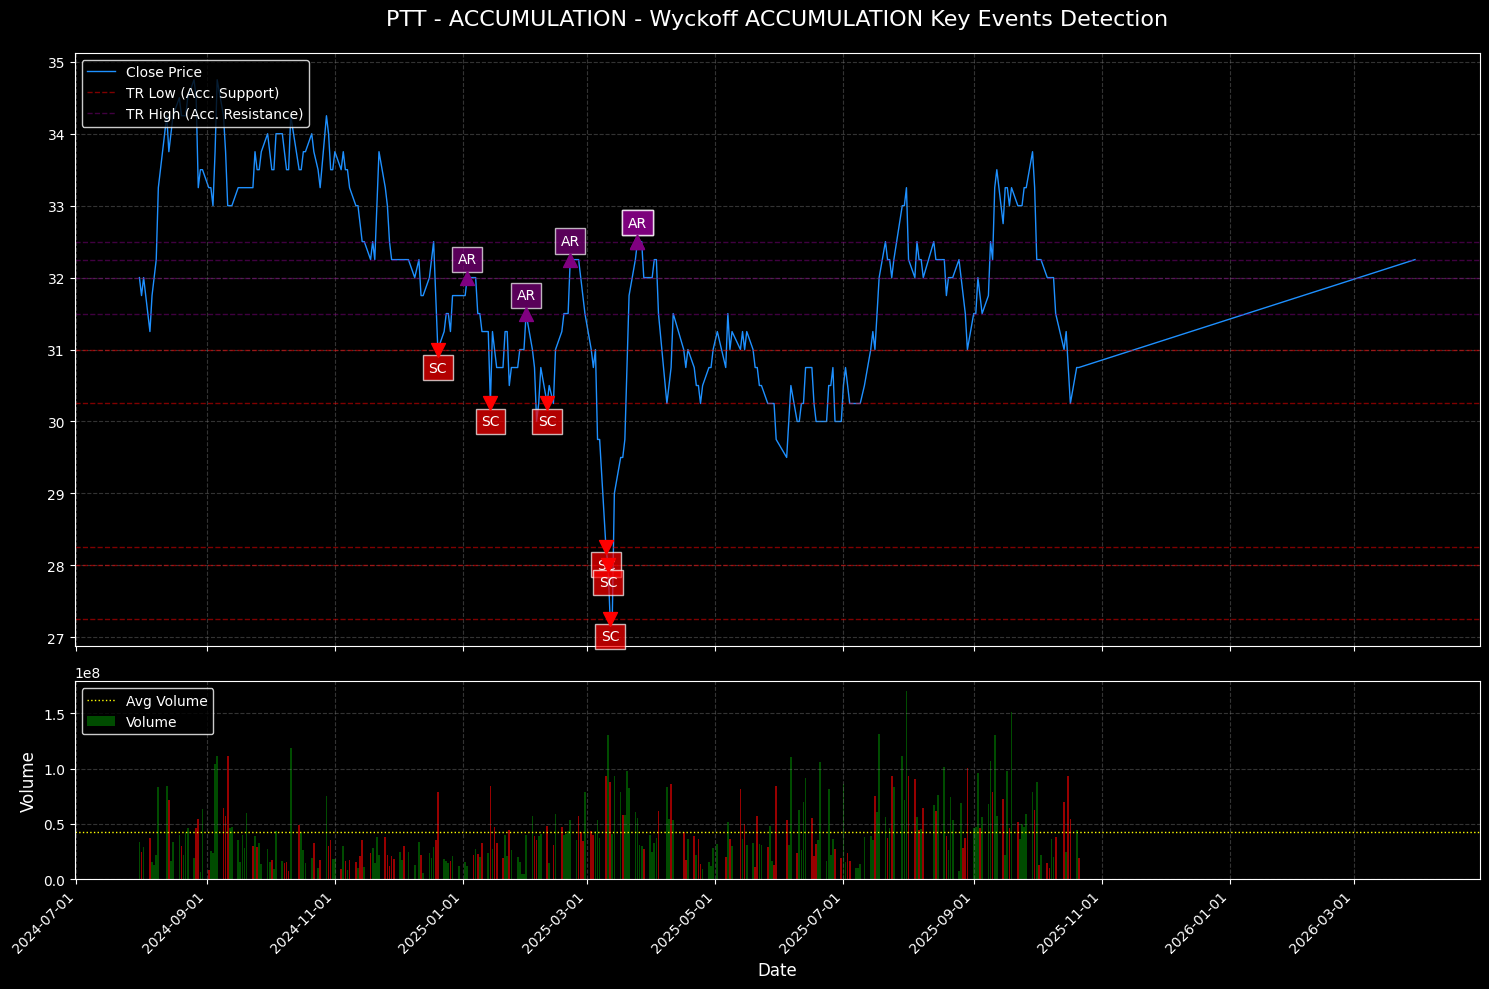


‚úÖ ‡∏û‡∏ö‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå Distribution (BC/AR/UTAD): 4 ‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå

3.2 ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü Wyckoff DISTRIBUTION Events...


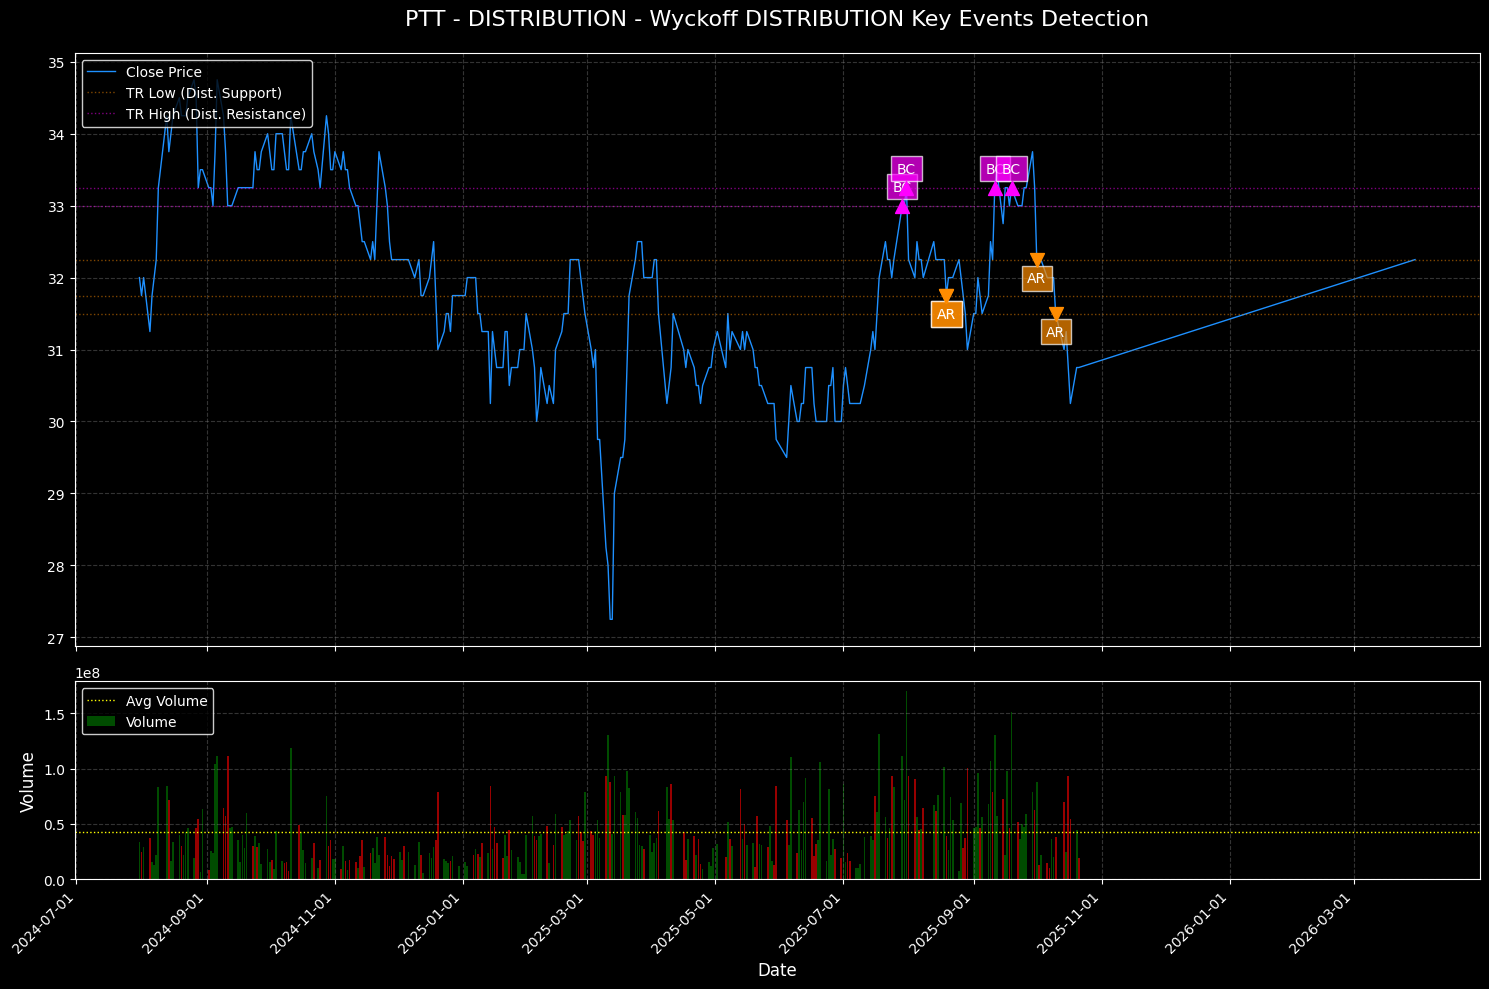

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from cassandra.cluster import Cluster

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏™‡πÑ‡∏ï‡∏•‡πå‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏Å‡∏£‡∏≤‡∏ü
plt.style.use('dark_background')

# 1Ô∏è‚É£ ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å Cassandra
def get_candlestick_data(symbol: str, limit: int = 3000):
    """‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏ó‡πà‡∏á‡πÄ‡∏ó‡∏µ‡∏¢‡∏ô‡∏à‡∏≤‡∏Å Cassandra ‡πÅ‡∏•‡∏∞‡∏à‡∏±‡∏î‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö"""
    try:
        # NOTE: ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÉ‡∏´‡πâ‡πÅ‡∏ô‡πà‡πÉ‡∏à‡∏ß‡πà‡∏≤ Cassandra Server ‡∏£‡∏±‡∏ô‡∏≠‡∏¢‡∏π‡πà‡∏ó‡∏µ‡πà 127.0.0.1:9042
        cluster = Cluster(['127.0.0.1'], port=9042)
        session = cluster.connect('stock_data')
    except Exception as e:
        print(f"Error connecting to Cassandra: {e}")
        raise ConnectionRefusedError("Could not connect to Cassandra. Check if it's running.")

    query = f"""
        SELECT time, open_price, high_price, low_price, close_price, volume
        FROM candlestick_data
        WHERE symbol='{symbol}'
        ORDER BY time DESC
        LIMIT {limit} 
    """
    rows = session.execute(query)
    df = pd.DataFrame(rows)

    if df.empty:
        raise ValueError(f"No data found for {symbol}")

    df.columns = df.columns.str.lower().str.strip()
    df.rename(columns={'open_price': 'open', 'high_price': 'high', 'low_price': 'low', 'close_price': 'close'}, inplace=True)
    df = df.sort_values('time')
    df.set_index('time', inplace=True)
    
    # ‡πÅ‡∏õ‡∏•‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏õ‡πá‡∏ô float
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
    
    return df

    # 2.1 üîÅ ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Wyckoff Distribution Key Events (‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏Ç‡∏≤‡∏¢)
# ‡πÉ‡∏ä‡πâ spring_tol ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡∏Å‡∏•‡∏≤‡∏á‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏•‡∏≤‡∏î‡πÄ‡∏Ñ‡∏•‡∏∑‡πà‡∏≠‡∏ô (Tolerance)
def detect_wyckoff_distribution(df, range_len=90, vol_factor=1.8, spring_tol=0.015, ar_check_len=15): 
    """
    ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÉ‡∏ô Wyckoff Distribution Schematic (BC, AR, UTAD)
    """
    prices = df['close'].values
    volumes = df['volume'].values
    events = []
    
    avg_vol = df['volume'].rolling(window=range_len).mean()
    utad_tol = spring_tol # ‡πÉ‡∏ä‡πâ‡∏ä‡∏∑‡πà‡∏≠ utad_tol ‡∏†‡∏≤‡∏¢‡πÉ‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏°‡∏≤‡∏¢‡∏ó‡∏µ‡πà‡∏ä‡∏±‡∏î‡πÄ‡∏à‡∏ô
    
    for i in range(range_len, len(df)):
        current_prices = prices[i - range_len : i]
        current_volumes = volumes[i - range_len : i]
        
        # 1. üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Buying Climax (BC)
        is_bc = (current_prices[-1] >= current_prices.max() * (1 - utad_tol)) and \
                (current_volumes[-1] > avg_vol.iloc[i] * vol_factor) and \
                (current_prices[-1] > current_prices[-5:].min()) 
        
        if is_bc:
            bc_idx = i - 1
            bc_price = prices[bc_idx]
            
            # 2. üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Automatic Reaction (AR)
            ar_end_idx = min(i + ar_check_len, len(df))
            ar_range = prices[i:ar_end_idx]
            
            if len(ar_range) > 0:
                ar_idx_local = np.argmin(ar_range)
                ar_idx_global = i + ar_idx_local
                ar_price = prices[ar_idx_global]
                
                if (bc_price - ar_price) / bc_price > utad_tol * 2: 
                    events.append({
                        "type": "BC/AR",
                        "event_type": "Distribution",
                        "bc_idx": bc_idx,
                        "ar_idx": ar_idx_global,
                        "tr_high": bc_price,
                        "tr_low": ar_price
                    })

        # 3. üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö UTAD (Upthrust After Distribution)
        if len(events) > 0:
            last_event = events[-1]
            if last_event['type'] == 'BC/AR':
                tr_low = last_event['tr_low']
                tr_high = last_event['tr_high']
                
                # UTAD: ‡∏ó‡∏∞‡∏•‡∏∏ TR High ‡∏ä‡∏±‡πà‡∏ß‡∏Ñ‡∏£‡∏≤‡∏ß ‡πÅ‡∏•‡πâ‡∏ß‡∏£‡πà‡∏ß‡∏á‡∏Å‡∏•‡∏±‡∏ö‡πÄ‡∏Ç‡πâ‡∏≤ TR
                if prices[i] > tr_high * (1 + utad_tol) and prices[i] > prices[i-1]:
                    vol_ratio = volumes[i] / avg_vol.iloc[i]
                    
                    if i + 1 < len(prices) and prices[i+1] < tr_high * (1 + utad_tol/2) and vol_ratio > 1.0:
                        events.append({
                            "type": "UTAD",
                            "event_type": "Distribution",
                            "tr_ref_idx": last_event['bc_idx'], 
                            "utad_idx": i,
                            "price": prices[i]
                        })
                        events.pop(-1) 

    final_events = [e for e in events if e['type'] == 'UTAD' or e['type'] == 'BC/AR']
    return final_events

# 2.2 üîΩ ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Wyckoff Accumulation Key Events (‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì‡∏ã‡∏∑‡πâ‡∏≠) - (‡πÇ‡∏Ñ‡πâ‡∏î‡πÄ‡∏î‡∏¥‡∏°)
def detect_wyckoff_accumulation(df, range_len=90, vol_factor=1.8, spring_tol=0.015, ar_check_len=15):
    """‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÉ‡∏ô Wyckoff Accumulation Schematic (SC, AR, Spring)"""
    prices = df['close'].values
    volumes = df['volume'].values
    events = []
    avg_vol = df['volume'].rolling(window=range_len).mean()
    
    for i in range(range_len, len(df)):
        current_prices = prices[i - range_len : i]
        current_volumes = volumes[i - range_len : i]
        
        # 1. üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Selling Climax (SC)
        is_sc = (current_prices[-1] <= current_prices.min() * (1 + spring_tol)) and \
                (current_volumes[-1] > avg_vol.iloc[i] * vol_factor) and \
                (current_prices[-1] < current_prices[-5:].max()) 
        
        if is_sc:
            sc_idx = i - 1
            sc_price = prices[sc_idx]
            
            # 2. üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Automatic Rally (AR)
            ar_end_idx = min(i + ar_check_len, len(df))
            ar_range = prices[i:ar_end_idx]
            
            if len(ar_range) > 0:
                ar_idx_local = np.argmax(ar_range)
                ar_idx_global = i + ar_idx_local
                ar_price = prices[ar_idx_global]
                
                if (ar_price - sc_price) / sc_price > spring_tol * 2: 
                    events.append({
                        "type": "SC/AR",
                        "event_type": "Accumulation",
                        "sc_idx": sc_idx,
                        "ar_idx": ar_idx_global,
                        "tr_low": sc_price,
                        "tr_high": ar_price
                    })

        # 3. üîç ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Spring/Shakeout
        if len(events) > 0:
            last_event = events[-1]
            if last_event['type'] == 'SC/AR':
                tr_low = last_event['tr_low']
                tr_high = last_event['tr_high']
                
                # Spring: ‡∏´‡∏•‡∏∏‡∏î TR Low ‡∏ä‡∏±‡πà‡∏ß‡∏Ñ‡∏£‡∏≤‡∏ß ‡πÅ‡∏•‡πâ‡∏ß‡∏î‡∏µ‡∏î‡∏Å‡∏•‡∏±‡∏ö‡πÄ‡∏Ç‡πâ‡∏≤ TR
                if prices[i] < tr_low * (1 - spring_tol) and prices[i] < prices[i-1]:
                    vol_ratio = volumes[i] / avg_vol.iloc[i]
                    
                    if i + 1 < len(prices) and prices[i+1] > tr_low * (1 - spring_tol/2) and vol_ratio > 1.0:
                        events.append({
                            "type": "Spring",
                            "event_type": "Accumulation",
                            "tr_ref_idx": last_event['sc_idx'], 
                            "spring_idx": i,
                            "price": prices[i]
                        })
                        events.pop(-1) 

    final_events = [e for e in events if e['type'] == 'Spring' or e['type'] == 'SC/AR']
    return final_events

# 2.3 ü§ù ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏´‡∏•‡∏±‡∏Å‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
def detect_all_wyckoff_events(df, **kwargs):
    """‡∏£‡∏±‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏ó‡∏±‡πâ‡∏á Accumulation ‡πÅ‡∏•‡∏∞ Distribution ‡πÅ‡∏•‡πâ‡∏ß‡∏£‡∏ß‡∏°‡∏ú‡∏•"""
    acc_events = detect_wyckoff_accumulation(df, **kwargs)
    dist_events = detect_wyckoff_distribution(df, **kwargs)
    return acc_events + dist_events

 # 3Ô∏è‚É£ Plot Wyckoff Accumulation & Distribution Events (‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á Title)
def plot_wyckoff_events(df, all_wyckoff_events, symbol='SYMBOL'):
    """‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡∏£‡∏≤‡∏Ñ‡∏≤‡πÅ‡∏•‡∏∞‡∏ß‡∏≠‡∏•‡∏∏‡πà‡∏° ‡∏û‡∏£‡πâ‡∏≠‡∏°‡πÅ‡∏™‡∏î‡∏á‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå Wyckoff (Accumulation ‡πÅ‡∏•‡∏∞ Distribution)"""
    if not all_wyckoff_events:
        # ‡∏´‡∏≤‡∏Å‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå‡πÄ‡∏•‡∏¢ ‡∏Å‡πá‡∏¢‡∏±‡∏á‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏•‡πà‡∏≤‡πÑ‡∏î‡πâ ‡πÅ‡∏ï‡πà‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏ï‡∏≤‡∏° symbol ‡∏ó‡∏µ‡πà‡∏£‡∏±‡∏ö‡∏°‡∏≤
        plot_title = f"{symbol} - No Wyckoff Events Detected"
    else:
        # üÜï ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡∏Ç‡∏≠‡∏á‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏Å‡∏£‡∏≠‡∏á‡∏°‡∏≤‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠ Title
        event_types = {e.get('event_type') for e in all_wyckoff_events}
        
        if len(event_types) == 1:
            # ‡∏´‡∏≤‡∏Å‡∏°‡∏µ‡πÅ‡∏Ñ‡πà Accumulation ‡∏´‡∏£‡∏∑‡∏≠ Distribution ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÉ‡∏î‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏´‡∏ô‡∏∂‡πà‡∏á
            chart_type = event_types.pop().upper() 
            plot_title = f"{symbol} - Wyckoff {chart_type} Key Events Detection"
        elif len(event_types) > 1:
            # ‡∏´‡∏≤‡∏Å‡∏°‡∏µ‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó (‡∏´‡∏£‡∏∑‡∏≠‡∏°‡∏µ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤‡∏´‡∏ô‡∏∂‡πà‡∏á)
            plot_title = f"{symbol} - Wyckoff Accumulation & Distribution Key Events Detection"
        else:
            # ‡∏Å‡∏£‡∏ì‡∏µ‡∏ó‡∏µ‡πà‡∏°‡∏µ events ‡πÅ‡∏ï‡πà event_type ‡πÄ‡∏õ‡πá‡∏ô None (‡πÑ‡∏°‡πà‡∏Ñ‡∏ß‡∏£‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡∏∂‡πâ‡∏ô)
            plot_title = f"{symbol} - Wyckoff Key Events Detection (Mixed/Unknown)"


    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü 2 ‡∏™‡πà‡∏ß‡∏ô (‡∏£‡∏≤‡∏Ñ‡∏≤‡∏Å‡∏±‡∏ö‡∏ß‡∏≠‡∏•‡∏∏‡πà‡∏°)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, 
                                   gridspec_kw={'height_ratios': [3, 1]})
    dates = df.index
    prices = df['close'].values
    volumes = df['volume'].values

    # 1. Plot ‡∏£‡∏≤‡∏Ñ‡∏≤ (ax1)
    ax1.plot(dates, prices, color='dodgerblue', linewidth=1, label='Close Price', zorder=1)
    
    # 2. Plot ‡∏ß‡∏≠‡∏•‡∏∏‡πà‡∏° (ax2)
    volume_colors = ['green' if df['close'].iloc[i] >= df['open'].iloc[i] else 'red' for i in range(len(df))]
    ax2.bar(dates, volumes, color=volume_colors, alpha=0.6, label='Volume')
    ax2.axhline(df['volume'].mean(), color='yellow', linestyle=':', linewidth=1, label='Avg Volume')

    # 3. Mark Key Events and Trading Range
    tr_lines_drawn = set() 
    
    all_wyckoff_events.sort(key=lambda x: x.get('sc_idx') or x.get('bc_idx') or x.get('spring_idx') or x.get('utad_idx'))
    
    for event in all_wyckoff_events:
        event_type = event.get('event_type')
        
        if event_type == 'Accumulation':
            # --- ACCUMULATION EVENTS (‡∏™‡∏µ‡πÇ‡∏ó‡∏ô‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß/‡∏°‡πà‡∏ß‡∏á) ---
            if event['type'] == 'SC/AR':
                sc_idx, ar_idx = event['sc_idx'], event['ar_idx']
                
                # Mark SC
                ax1.scatter(dates[sc_idx], prices[sc_idx], color='red', s=100, marker='v', zorder=5)
                ax1.annotate("SC", (dates[sc_idx], prices[sc_idx] * 0.995), color='white', fontsize=10, ha='center', va='top', bbox=dict(facecolor='red', alpha=0.7))
                # Mark AR
                ax1.scatter(dates[ar_idx], prices[ar_idx], color='purple', s=100, marker='^', zorder=5)
                ax1.annotate("AR", (dates[ar_idx], prices[ar_idx] * 1.005), color='white', fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='purple', alpha=0.7))
                
                # Draw TR Lines 
                if (event['tr_low'], 'Acc') not in tr_lines_drawn:
                    ax1.axhline(event['tr_low'], color='red', linestyle='--', linewidth=1, alpha=0.5, label='TR Low (Acc. Support)')
                    tr_lines_drawn.add((event['tr_low'], 'Acc'))
                if (event['tr_high'], 'Acc') not in tr_lines_drawn:
                    ax1.axhline(event['tr_high'], color='purple', linestyle='--', linewidth=1, alpha=0.5, label='TR High (Acc. Resistance)')
                    tr_lines_drawn.add((event['tr_high'], 'Acc'))
                
            elif event['type'] == 'Spring':
                idx = event['spring_idx']
                # Mark Spring
                ax1.scatter(dates[idx], prices[idx], color='lime', s=150, marker='*', edgecolors='black', linewidth=1.5, zorder=6)
                ax1.annotate("SPRING (Buy)", (dates[idx], prices[idx] * 0.99), color='black', fontsize=12, fontweight='bold', ha='center', va='top', bbox=dict(facecolor='lime', alpha=0.9))
                ax2.scatter(dates[idx], volumes[idx], color='lime', s=80, zorder=6)


        elif event_type == 'Distribution':
            # --- DISTRIBUTION EVENTS (‡∏™‡∏µ‡πÇ‡∏ó‡∏ô‡∏ä‡∏°‡∏û‡∏π/‡∏™‡πâ‡∏°/‡πÅ‡∏î‡∏á) ---
            if event['type'] == 'BC/AR':
                bc_idx, ar_idx = event['bc_idx'], event['ar_idx']
                
                # Mark BC
                ax1.scatter(dates[bc_idx], prices[bc_idx], color='fuchsia', s=100, marker='^', zorder=5)
                ax1.annotate("BC", (dates[bc_idx], prices[bc_idx] * 1.005), color='white', fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='fuchsia', alpha=0.7))
                # Mark AR (Reaction)
                ax1.scatter(dates[ar_idx], prices[ar_idx], color='darkorange', s=100, marker='v', zorder=5)
                ax1.annotate("AR", (dates[ar_idx], prices[ar_idx] * 0.995), color='white', fontsize=10, ha='center', va='top', bbox=dict(facecolor='darkorange', alpha=0.7))
                
                # Draw TR Lines 
                if (event['tr_low'], 'Dist') not in tr_lines_drawn:
                    ax1.axhline(event['tr_low'], color='darkorange', linestyle=':', linewidth=1, alpha=0.5, label='TR Low (Dist. Support)')
                    tr_lines_drawn.add((event['tr_low'], 'Dist'))
                if (event['tr_high'], 'Dist') not in tr_lines_drawn:
                    ax1.axhline(event['tr_high'], color='fuchsia', linestyle=':', linewidth=1, alpha=0.5, label='TR High (Dist. Resistance)')
                    tr_lines_drawn.add((event['tr_high'], 'Dist'))

            elif event['type'] == 'UTAD':
                idx = event['utad_idx']
                # Mark UTAD
                ax1.scatter(dates[idx], prices[idx], color='red', s=150, marker='X', edgecolors='black', linewidth=1.5, zorder=6)
                ax1.annotate("UTAD (Sell)", (dates[idx], prices[idx] * 1.005), color='white', fontsize=12, fontweight='bold', ha='center', va='bottom', bbox=dict(facecolor='red', alpha=0.9))
                ax2.scatter(dates[idx], volumes[idx], color='red', s=80, zorder=6)


    # --- ‡∏õ‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏á‡∏Å‡∏£‡∏≤‡∏ü ---
    # üÜï ‡πÉ‡∏ä‡πâ plot_title ‡∏ó‡∏µ‡πà‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÑ‡∏ß‡πâ‡∏î‡πâ‡∏≤‡∏ô‡∏ö‡∏ô
    ax1.set_title(plot_title, color='white', fontsize=16, pad=20) 
    ax1.tick_params(axis='y', colors='white')
    ax1.grid(True, color='gray', linestyle='--', alpha=0.4)
    
    handles, labels = ax1.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax1.legend(unique_labels.values(), unique_labels.keys(), facecolor='black', edgecolor='white', loc='upper left')

    ax2.set_xlabel("Date", color='white', fontsize=12)
    ax2.set_ylabel("Volume", color='white', fontsize=12)
    ax2.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.grid(True, color='gray', linestyle='--', alpha=0.4)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45, ha='right')
    
    handles2, labels2 = ax2.get_legend_handles_labels()
    unique_labels2 = dict(zip(labels2, handles2))
    ax2.legend(unique_labels2.values(), unique_labels2.keys(), facecolor='black', edgecolor='white', loc='upper left')

    plt.tight_layout()
    plt.show()

    # 4Ô∏è‚É£ ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô (Execution)
try:
    # --- Config ---
    symbol = "PTT"  # ‡∏´‡∏£‡∏∑‡∏≠‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå
    DATA_LIMIT = 300 
    
    print(f"1. ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• {symbol} (Limit: {DATA_LIMIT} ‡∏ß‡∏±‡∏ô)...")
    df_original = get_candlestick_data(symbol, limit=DATA_LIMIT)
    
    # 2. ‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Wyckoff Events ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î (Accumulation & Distribution)
    print("\n2. ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö Wyckoff Events ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î...")
    all_wyckoff_events = detect_all_wyckoff_events(
        df_original, 
        range_len=90, 
        vol_factor=1.8, 
        spring_tol=0.015
    )
    
    # --- üÜï ‡∏Å‡∏≤‡∏£‡πÅ‡∏¢‡∏Å‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• Accumulation Events ---
    acc_events = [e for e in all_wyckoff_events if e.get('event_type') == 'Accumulation']
    acc_count = len(acc_events)
    print(f"\n‚úÖ ‡∏û‡∏ö‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå Accumulation (SC/AR/Spring): {acc_count} ‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå")
    print("\n3.1 ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü Wyckoff ACCUMULATION Events...")
    plot_wyckoff_events(df_original, acc_events, symbol=f"{symbol} - ACCUMULATION")
    
    # --- üÜï ‡∏Å‡∏≤‡∏£‡πÅ‡∏¢‡∏Å‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• Distribution Events ---
    dist_events = [e for e in all_wyckoff_events if e.get('event_type') == 'Distribution']
    dist_count = len(dist_events)
    print(f"\n‚úÖ ‡∏û‡∏ö‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå Distribution (BC/AR/UTAD): {dist_count} ‡πÄ‡∏´‡∏ï‡∏∏‡∏Å‡∏≤‡∏£‡∏ì‡πå")
    print("\n3.2 ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü Wyckoff DISTRIBUTION Events...")
    plot_wyckoff_events(df_original, dist_events, symbol=f"{symbol} - DISTRIBUTION")
    
    
except ConnectionRefusedError as e:
    print(f"\n‚ùå ‡∏Å‡∏≤‡∏£‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏ï‡πà‡∏≠‡∏•‡πâ‡∏°‡πÄ‡∏´‡∏•‡∏ß: {e}")
    print("‡πÇ‡∏õ‡∏£‡∏î‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤ Cassandra Server (127.0.0.1:9042) ‡πÑ‡∏î‡πâ‡∏£‡∏±‡∏ô‡∏≠‡∏¢‡∏π‡πà‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà")
except ValueError as e:
    print(f"\n‚ùå ‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•: {e}")
except Exception as e:
    print(f"\n‚ùå ‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏Ñ‡∏≤‡∏î‡∏Ñ‡∏¥‡∏î: {e}")
    print(f"Detail: {e}")